In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src import train, generate, eval
from modules.config import read_config
import modules.plots as plots
from modules.datageneration import load_data, data_functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
def test(xs, noise=0):
    x = xs[:, 0]
    return 2 * np.exp((-(x)**2)) + 0.05*x + noise

test_x = np.arange(0, 10, 0.1).reshape(-1, 1)
test_y = test(test_x)
print(test_x.shape)
print(test_y.shape)

(100, 1)
(100,)


In [4]:
data_functions["multidim_exponential_combination"]
data_functions

{'sinusoidal': <function modules.datageneration.sinusoidal_func(xs, noise=0) -> <built-in function array>>,
 'sum': <function modules.datageneration.sum(xs, noise=0) -> <built-in function array>>,
 'multidim_sinusoidal_combination': <function modules.datageneration.multidim_sinusoidal_combination(xs, noise=0) -> <built-in function array>>,
 'tendim_sinusoidal_combination': <function modules.datageneration.tendim_sinusoidal_combination(xs, noise=0) -> <built-in function array>>,
 'multidim_exponential_combination': <function modules.datageneration.multidim_exponential_combination(xs, noise=0) -> <built-in function array>>,
 'onedim_non_linear': <function modules.datageneration.onedim_non_linear(xs, noise=0) -> <built-in function array>>,
 'onedim_linear': <function modules.datageneration.onedim_linear(xs, noise=0) -> <built-in function array>>}

In [5]:
BASE_DIR = "../tests/gen-func-test"
PROFILE = "test"

In [50]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]
DATASET_NAME = dataset_config["NAME"]

dataset_config["DATA_FUNC"] = "multidim_exponential_combination"
dataset_config["SIGMA"] = "0.3"
dataset_config["X_DIM"] = "20"

====== Generating profile test-data ======
Train: (-2, 2)
Y-space: -8.315792490749805 - 8.434292785030278
In Domain: (-2, 2)
Y-space: -7.731625499151071 - 8.012830130391338
Out Domain: (-4, 4)
Y-space: -1.0564420822776848 - 1.0388014962502443


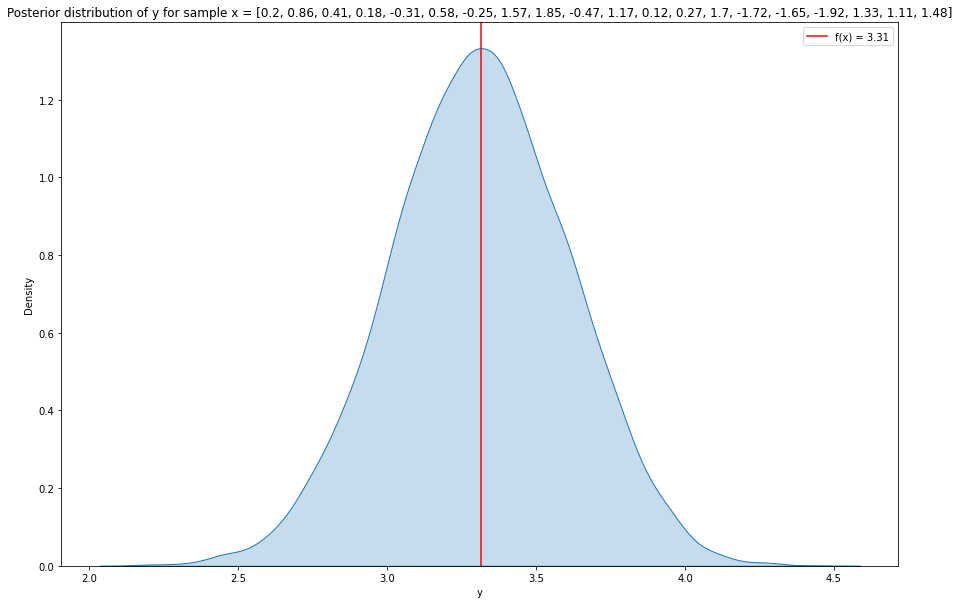

In [51]:
if True:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [36]:
(x_train, y_train), (x_val, y_val), (x_test_in_domain, y_test_in_domain), (x_test_out_domain, y_test_out_domain) = load_data(f"{BASE_DIR}/datasets/{DATASET_NAME}")
x_test = torch.vstack((x_test_in_domain, x_test_out_domain))
y_test = torch.vstack((y_test_in_domain, y_test_out_domain))
print(x_test.shape, y_test.shape)

torch.Size([2000, 4]) torch.Size([2000, 1])


In [37]:
i = 0
x_test_out_domain[i], y_test_out_domain[i]

(tensor([ 3.6925,  2.1215, -3.1405, -3.0395]), tensor([0.1069]))

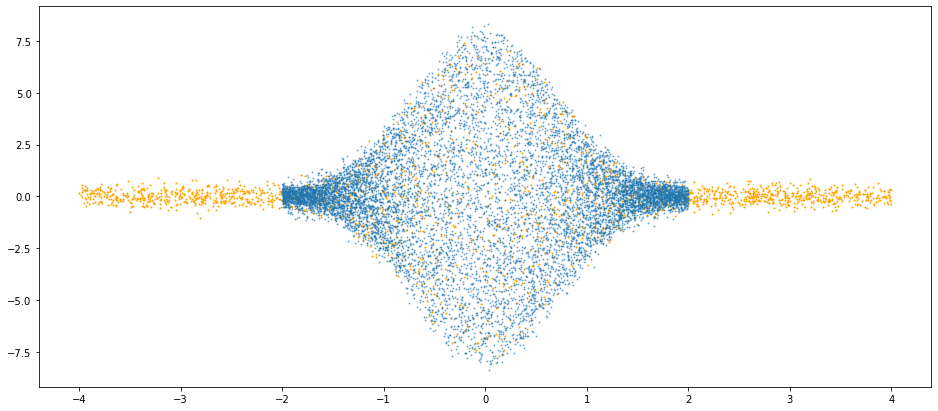

In [45]:
if dataset_config["X_DIM"] == "1":
    fig, ax = plt.subplots(figsize=(16, 7))
    plt.scatter(x_test.squeeze(), y_test, color="orange", s=1)
    plt.scatter(x_train.squeeze(), y_train, s=1, alpha=0.5)

elif dataset_config["X_DIM"] == "2":
    # 2d plot
    fig, ax = plt.subplots(figsize=(16, 7))
    ax = plt.axes(projection='3d')
    ax.scatter3D(x_test[:, 0], x_test[:, 1], y_test, color="orange", s=1)
    ax.scatter3D(x_train[:, 0], x_train[:, 1], y_train, s=1, alpha=0.5)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()
    

else:
    i = 0
    fig, ax = plt.subplots(figsize=(16, 7))
    plt.scatter(x_test[:, i], y_test, color="orange", s=1)
    plt.scatter(x_train[:, i], y_train, s=1, alpha=0.5)
    

In [39]:
#Min y and max y of the train data
y_min = y_train.min()
y_max = y_train.max()
print(f"Train Data: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_in_domain.min()
y_max = y_test_in_domain.max()
print(f"Test Data in domain: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_out_domain.min()
y_max = y_test_out_domain.max()
print(f"Test data out domain: | y_min: {y_min}, y_max: {y_max}")

Train Data: | y_min: -8.359582901000977, y_max: 8.33759593963623
Test Data in domain: | y_min: -7.705108642578125, y_max: 7.7201433181762695
Test data out domain: | y_min: -1.0378191471099854, y_max: 0.864844560623169
